In [35]:
# lets import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score, precision_score, recall_score, classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import export_graphviz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import re
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from six import StringIO
from IPython.display import Image
import pydotplus
import os

# filter to ignore warnings
import warnings
warnings.filterwarnings('ignore')


Reading the data

In [36]:
# lets read the csv file
df1 = pd.read_excel('Case_Study_Data_.xlsx', sheet_name='Case Study 1')

In [37]:
# previewing the data
df1.head()

,Unnamed: 0,Unnamed: 1,Productivity,Quality,Attendance
0,Employee No,Project,Score,Score,Score
1,397,QQQQ,1.8164,0.8374,1
2,91,AAAA,1.1702,0.9714,1
3,186,AAAA,1.2785,0.9704,0.9933
4,318,AAAA,1.2173,0.9891,1


In [38]:
# lets see the side of the dataset
df1.shape

(478, 5)

In [39]:
# lets see the columns
df1.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Productivity', 'Quality', 'Attendance'], dtype='object')

In [40]:
# lets rename the first two columns to employee number and project
df1 = df1.rename(columns = {'Unnamed: 0': 'Employee_Number', 'Unnamed: 1': 'Project'})
df1.columns

Index(['Employee_Number', 'Project', 'Productivity', 'Quality', 'Attendance'], dtype='object')

In [41]:
# lets remove the first row of data from the dataset
df1 = df1.iloc[1:]
df1.head()

,Employee_Number,Project,Productivity,Quality,Attendance
1,397,QQQQ,1.8164,0.8374,1
2,91,AAAA,1.1702,0.9714,1
3,186,AAAA,1.2785,0.9704,0.9933
4,318,AAAA,1.2173,0.9891,1
5,362,AAAA,1.1918,0.9754,0.984


In [42]:
# lets convert the data types in column 1 to int, column 3,4,5 to float

# Convert column 1 to integer
df1['Employee_Number'] = df1['Employee_Number'].astype(int)

# Convert columns 3, 4, and 5 to float
df1[['Productivity', 'Quality', 'Attendance']] = df1[['Productivity', 'Quality', 'Attendance']].astype(float)
df1.dtypes

Employee_Number      int64
Project             object
Productivity       float64
Quality            float64
Attendance         float64
dtype: object

In [43]:
# lets check for missing values
df1.isnull().sum()

Employee_Number    0
Project            0
Productivity       5
Quality            6
Attendance         1
dtype: int64

In [44]:
# we assume that the data is missing at random so we fill the missing data withe the mean
df1['Productivity'].fillna(df1['Productivity'].mean(), inplace=True)
df1['Quality'].fillna(df1['Quality'].mean(), inplace=True)
df1['Attendance'].fillna(df1['Attendance'].mean(), inplace=True)
df1.isnull().sum()

Employee_Number    0
Project            0
Productivity       0
Quality            0
Attendance         0
dtype: int64

In [45]:
# check for duplicates
df1.duplicated().any()

False

In [46]:
# lets see the top of the dataset
df1.head()

,Employee_Number,Project,Productivity,Quality,Attendance
1,397,QQQQ,1.8164,0.8374,1.0000
2,91,AAAA,1.1702,0.9714,1.0000
3,186,AAAA,1.2785,0.9704,0.9933
4,318,AAAA,1.2173,0.9891,1.0000
5,362,AAAA,1.1918,0.9754,0.9840


visualizations

# ***PERFORMERS***

In [13]:
import pandas as pd

# Assuming df1 contains your data

# Define quartiles for each performance metric
productivity_quartiles = df1['Productivity'].quantile([0, 0.25, 0.75, 1])
quality_quartiles = df1['Quality'].quantile([0, 0.25, 0.75, 1])
attendance_quartiles = df1['Attendance'].quantile([0, 0.25, 0.75, 1])

# Function to categorize performance
def categorize_performance(row):
    if row['Productivity'] > productivity_quartiles[0.75] and row['Quality'] > quality_quartiles[0.75] and row['Attendance'] > attendance_quartiles[0.75]:
        return 'High Performer'
    elif row['Productivity'] <= productivity_quartiles[0.25] and row['Quality'] <= quality_quartiles[0.25] and row['Attendance'] <= attendance_quartiles[0.25]:
        return 'Low Performer'
    else:
        return 'Mid Performer'

# Apply the function to create a new column 'Performance'
df1['Performance'] = df1.apply(categorize_performance, axis=1)

# Count the number of employees in each performance category
performance_counts = df1['Performance'].value_counts()

# Display the counts for each category
print(performance_counts)


Performance
Mid Performer     452
Low Performer      23
High Performer      2
Name: count, dtype: int64


In [14]:
# Filter performers
high_performers = df1[df1['Performance'] == 'High Performer']
mid_performers = df1[df1['Performance'] == 'Mid Performer']
low_performers = df1[df1['Performance'] == 'Low Performer']

# Display the list of high performers
print("List of High Performers:")
high_performers

# Get the list of Employee_Numbers for high performers
high_performer_employee_numbers = high_performers['Employee_Number'].tolist()

# Print the list of Employee_Numbers for high performers
print(high_performer_employee_numbers)

List of High Performers:
[126, 445]


In [15]:
import plotly.graph_objects as go
import pandas as pd

# Function to categorize performance
def categorize_performance(row):
    if row['Productivity'] > productivity_quartiles[0.75] and row['Quality'] > quality_quartiles[0.75] and row['Attendance'] > attendance_quartiles[0.75]:
        return 'High Performer'
    elif row['Productivity'] <= productivity_quartiles[0.25] and row['Quality'] <= quality_quartiles[0.25] and row['Attendance'] <= attendance_quartiles[0.25]:
        return 'Low Performer'
    else:
        return 'Mid Performer'

# Apply the function to create a new column 'Performance'
df1['Performance'] = df1.apply(categorize_performance, axis=1)

# Identify low, mid, and high performers
low_performers = df1[df1['Performance'] == 'Low Performer']
mid_performers = df1[df1['Performance'] == 'Mid Performer']
high_performers = df1[df1['Performance'] == 'High Performer']

# Count the number of employees in each category
num_low_performers = len(low_performers)
num_mid_performers = len(mid_performers)
num_high_performers = len(high_performers)

# Create labels and values for the pie chart
labels = ['Low Performers', 'Mid Performers', 'High Performers']
values = [num_low_performers, num_mid_performers, num_high_performers]

# Create a 3D pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3, pull=[0, 0.1])])

# Set layout properties
fig.update_layout(title='Employee Performance Distribution',
                  scene=dict(aspectmode="cube"))

# Show the pie chart
fig.show()


**CORRELATION**

In [16]:
# Calculate correlation matrix
correlation_matrix = df1[['Productivity', 'Quality', 'Attendance']].corr()
print(correlation_matrix)


              Productivity   Quality  Attendance
Productivity      1.000000  0.017899    0.050332
Quality           0.017899  1.000000    0.165112
Attendance        0.050332  0.165112    1.000000


1. **Productivity and Quality**:
   - Correlation Coefficient: 0.0179
   - Interpretation: The correlation between Productivity and Quality is very low (close to zero), indicating a very weak positive linear relationship. This suggests that there is little to no direct linear relationship between an employee's productivity and the quality of their work.

2. **Productivity and Attendance**:
   - Correlation Coefficient: 0.0503
   - Interpretation: The correlation between Productivity and Attendance is also quite low (close to zero), indicating a very weak positive linear relationship. This suggests that there is little to no direct linear relationship between an employee's productivity and their attendance.

3. **Quality and Attendance**:
   - Correlation Coefficient: 0.1651
   - Interpretation: The correlation between Quality and Attendance is moderately low (between 0.1 and 0.3), indicating a weak positive linear relationship. This suggests that there is a slight tendency for employees with higher attendance to also have higher quality work.

Overall, based on the correlation coefficients, it appears that there are no strong linear relationships between any pair of variables (Productivity, Quality, and Attendance). This means that changes in one variable are not strongly associated with changes in another variable in a linear fashion.

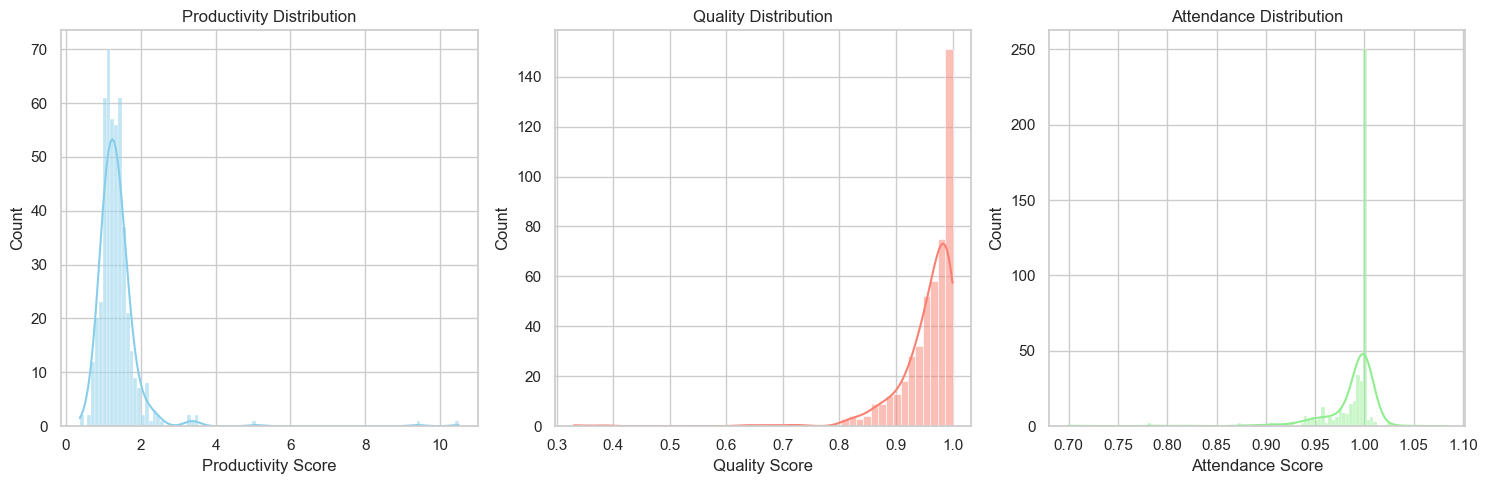

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plots
sns.set(style="whitegrid")

# Create subplots for Productivity, Quality, and Attendance
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Productivity Distribution
sns.histplot(df1['Productivity'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Productivity Distribution')
axes[0].set_xlabel('Productivity Score')

# Quality Distribution
sns.histplot(df1['Quality'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Quality Distribution')
axes[1].set_xlabel('Quality Score')

# Attendance Distribution
sns.histplot(df1['Attendance'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Attendance Distribution')
axes[2].set_xlabel('Attendance Score')

# Set layout
plt.tight_layout()

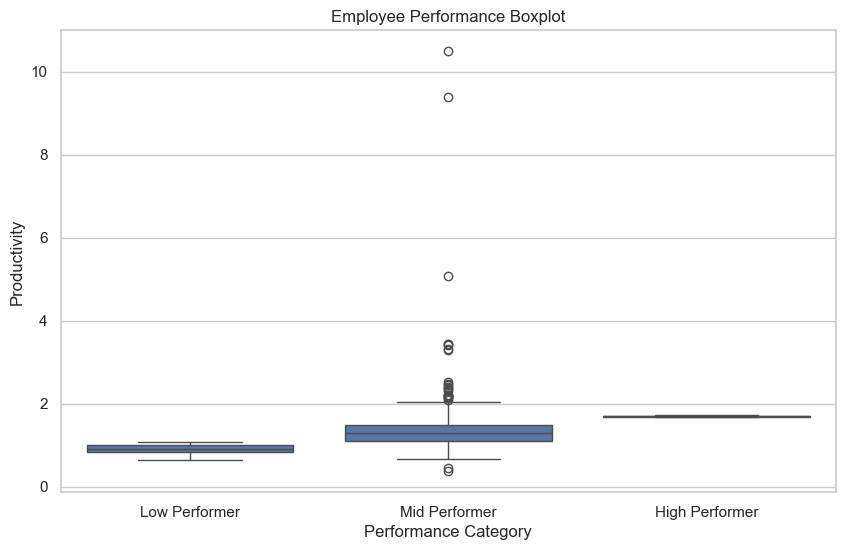

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 contains your data and 'Performance' is the column indicating performance category

# Set the style for the plot
sns.set(style="whitegrid")

# Create a boxplot for Employee Performance
plt.figure(figsize=(10, 6))
sns.boxplot(x='Performance', y='Productivity', data=df1, order=['Low Performer', 'Mid Performer', 'High Performer'])
plt.title('Employee Performance Boxplot')
plt.xlabel('Performance Category')
plt.ylabel('Productivity')
plt.show()


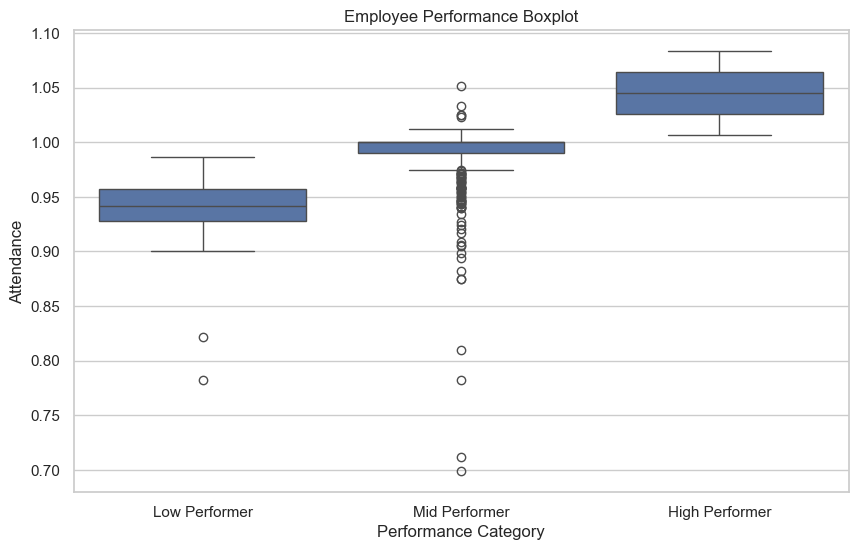

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 contains your data and 'Performance' is the column indicating performance category

# Set the style for the plot
sns.set(style="whitegrid")

# Create a boxplot for Employee Performance
plt.figure(figsize=(10, 6))
sns.boxplot(x='Performance', y='Attendance', data=df1, order=['Low Performer', 'Mid Performer', 'High Performer'])
plt.title('Employee Performance Boxplot')
plt.xlabel('Performance Category')
plt.ylabel('Attendance')
plt.show()


# ***PRODUCTIVITY***

In [58]:
# lets see the average productivity score

# Calculate the average productivity score
average_productivity_score = df1['Productivity'].mean()

print(f'The average productivity score is: {average_productivity_score:.2f}')


The average productivity score is: 1.37


In [60]:
# lets see the average quality score

# Calculate the average quality score
average_quality_score = df1['Quality'].mean()

print(f'The average quality score is: {average_quality_score:.2f}')

The average quality score is: 0.95


Lets see the most productive employees

In [48]:
# Sort the DataFrame by 'Productivity' in descending order
most_productive_employees = df1.sort_values(by='Productivity', ascending=False)

# Print the top N most productive employees
print(most_productive_employees[['Employee_Number', 'Productivity']].head())


     Employee_Number  Productivity
320              363       10.4948
271              182        9.3869
344              151        5.0691
373              405        3.4487
11               454        3.4457


Lets see the least productive employees

In [49]:
# least productive
print(most_productive_employees[['Employee_Number', 'Productivity']].tail())

     Employee_Number  Productivity
394              260        0.6831
115              409        0.6759
222               82        0.6395
250              201        0.4485
328               52        0.3750


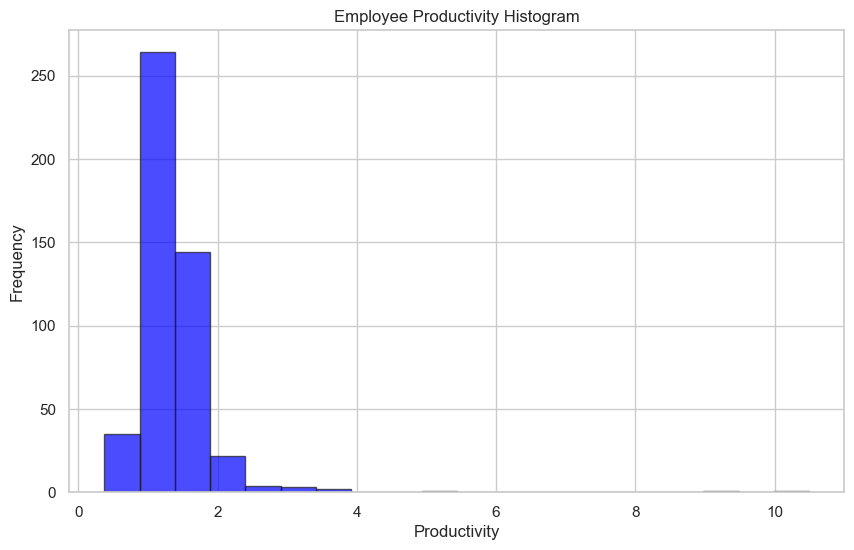

In [50]:
import matplotlib.pyplot as plt

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df1['Productivity'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Employee Productivity Histogram')
plt.xlabel('Productivity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


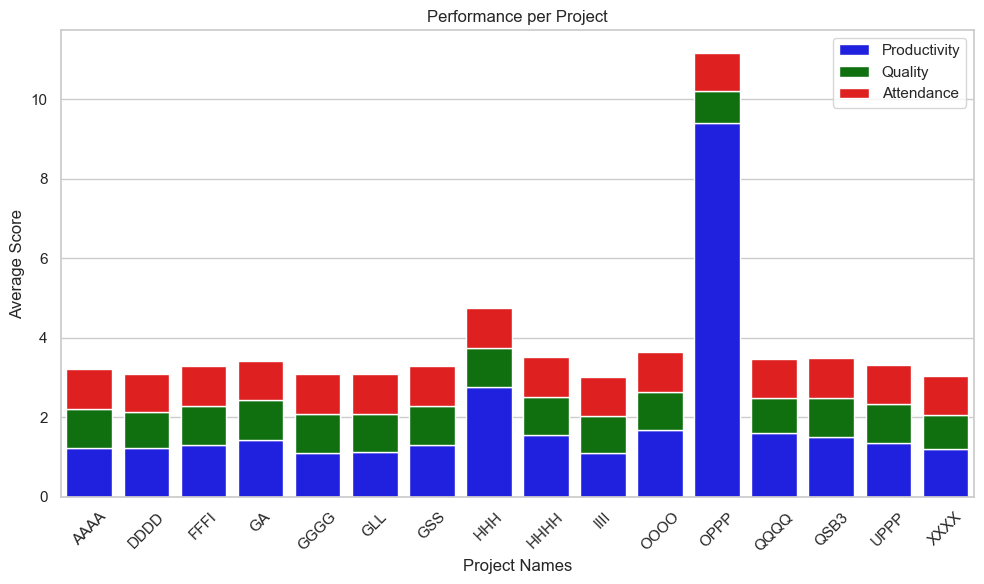

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'Project' and calculate the average scores
average_scores = df1.groupby('Project')[['Productivity', 'Quality', 'Attendance']].mean()

# Set the figure size
plt.figure(figsize=(10, 6))

# Define the color palette
colors = ['blue', 'green', 'red']

# Create the stacked bar chart
sns.barplot(x=average_scores.index, y=average_scores['Productivity'], color=colors[0], label='Productivity')
sns.barplot(x=average_scores.index, y=average_scores['Quality'], color=colors[1], bottom=average_scores['Productivity'], label='Quality')
sns.barplot(x=average_scores.index, y=average_scores['Attendance'], color=colors[2], bottom=average_scores['Productivity'] + average_scores['Quality'], label='Attendance')

# Set the x-axis labels and title
plt.xlabel('Project Names')
plt.ylabel('Average Score')
plt.title('Performance per Project')

# Add a legend
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [54]:
df1.columns

Index(['Employee_Number', 'Project', 'Productivity', 'Quality', 'Attendance'], dtype='object')

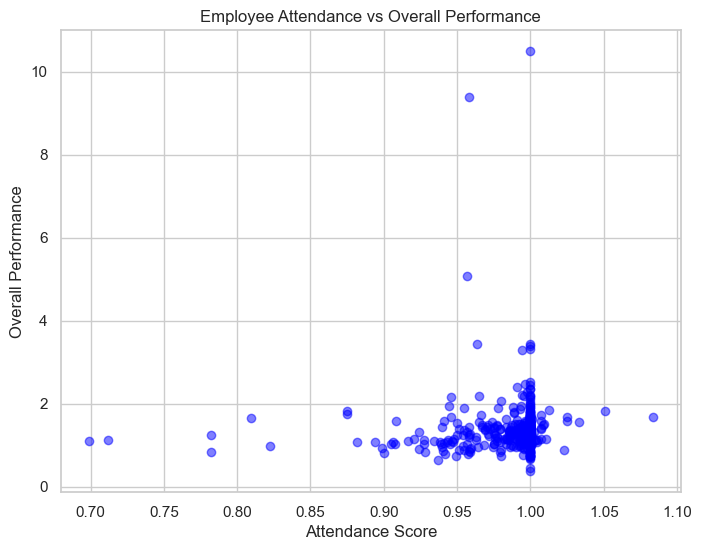

In [55]:
# lets create a scatter plot for employee attendance score against overall performance
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df1['Attendance'], df1['Productivity'], alpha=0.5)
plt.title('Employee Attendance vs Overall Performance')
plt.xlabel('Attendance Score')
plt.ylabel('Overall Performance')
plt.grid(True)
plt.show()
